In [21]:
import pandas as pd

In [22]:
import seaborn as sns

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
import datetime as dt

In [25]:
crime=pd.read_csv("D:\MS\Project\PROJ_CAN\convert_tor.csv")

In [26]:
crime.head()

,Date,Premisetype,Offence,Year,Month,Day,Dayofyear,Dayofweek,Hour,Crime,Neighbourhood,Id
0,2018-07-03T03:46:00.000Z,Outside,Assault,2018,July,3,184,Tuesday,3,Assault,Down Town,1
1,2018-07-03T15:15:00.000Z,Outside,Theft From Motor Vehicle Over,2018,July,3,184,Tuesday,15,Theft,Toronto,2
2,2018-11-14T15:09:00.000Z,Outside,Homicide,2018,November,14,318,Wednesday,15,Homicide,Ann Arbour Rd,3
3,2018-07-17T02:14:00.000Z,Outside,Assault Peace Officer,2018,July,17,198,Tuesday,2,Assault,Mississauga,4
4,2018-10-27T10:45:00.000Z,Other,Assault,2018,October,27,300,Saturday,10,Assault,Toronto,5


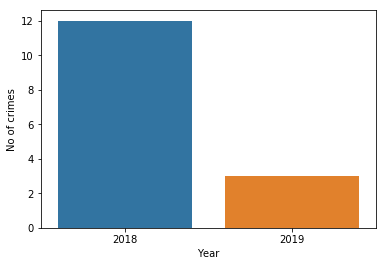

In [27]:
sns.countplot(x='Year',data=crime) #CRIMES EACH YEAR
plt.ylabel('No of crimes')
plt.show()

In [28]:
from datetime import datetime

In [29]:
#Convert date in the data set to an interpretative format that python can understand.
crime['Date'] = pd.to_datetime(crime['Date'],format='%Y-%m-%dT%H:%M:%S.%fZ')

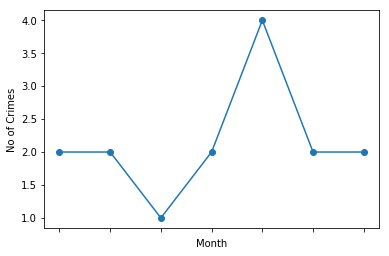

In [42]:
import numpy as np
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
crime.groupby('Month')['Id'].count().plot(marker='o')

plt.ylabel('No of Crimes')
plt.show()

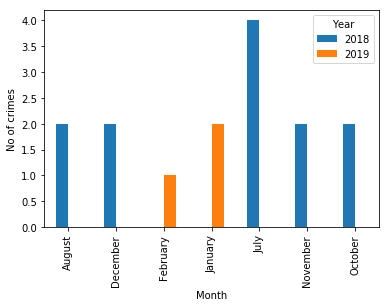

In [31]:
crime.groupby(['Month','Year'])['Id'].count().sort_values(ascending=True).unstack().plot(kind='bar')

plt.ylabel('No of crimes')
plt.show()

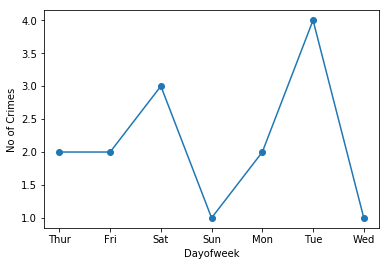

In [48]:
crime.groupby('Dayofweek')['Id'].count().plot(marker='o',label='Crimes')
week=['Thur','Fri','Sat','Sun','Mon','Tue','Wed']
plt.ylabel('No of Crimes')
plt.xticks(np.arange(7),week)
plt.show()

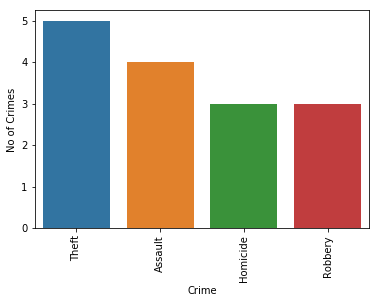

In [33]:
sns.countplot(x='Crime',data=crime,order=crime['Crime'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('No of Crimes')
plt.show()

In [34]:
temp=crime.groupby('Premisetype')['Id'].count().sort_values(ascending=False)
temp

Premisetype
Outside       10
Inside         3
Other          1
Commercial     1
Name: Id, dtype: int64

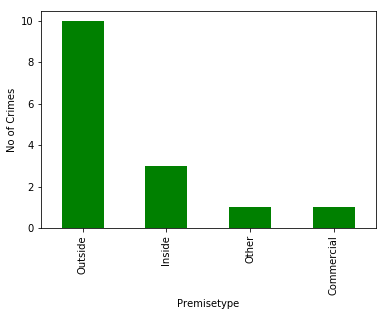

In [35]:
temp.plot(kind='bar',color='green')
plt.ylabel('No of Crimes')
plt.show()

In [36]:
temp=crime.pivot_table(values='Id', index='Month', columns='Year', aggfunc=np.size)

In [37]:
temp

Year,2018,2019
Month,,
August,2.0,NaN
December,2.0,NaN
February,NaN,1.0
January,NaN,2.0
July,4.0,NaN
November,2.0,NaN
October,2.0,NaN


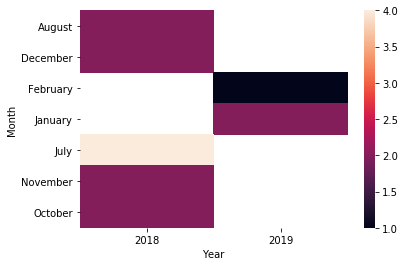

In [38]:
sns.heatmap(temp)

plt.show()

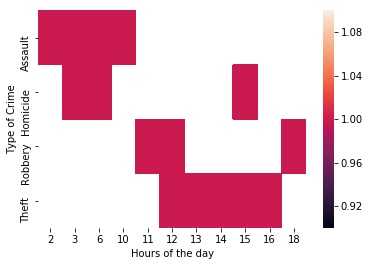

In [39]:
temps= crime.pivot_table(values='Id', index='Crime',columns=crime['Date'].dt.hour, aggfunc=np.size)
sns.heatmap(temps)
plt.xlabel('Hours of the day')
plt.ylabel('Type of Crime')
plt.show()

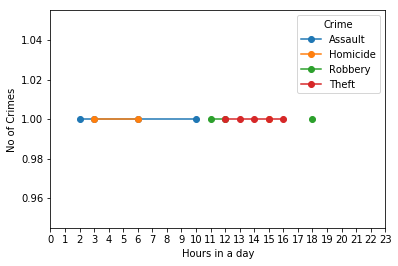

In [54]:
crime.groupby([crime['Date'].dt.hour,'Crime'])['Id'].count().unstack().plot(marker='o')
plt.ylabel('No of Crimes')
plt.xlabel('Hours in a day')
plt.xticks(np.arange(24))
plt.show()